In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from scipy.stats import linregress

#Pull in csv from total yearly rent vs. income
path_2 = ("../output_data/rental(total)_income_merged.csv")
merged = pd.read_csv(path_2)

In [3]:
#Pull in homelessness data
path = ("../Homelessness Data/2015_homelessness.csv")
homeless_2015 = pd.read_csv(path)

path_2 = ("../Homelessness Data/2016_homelessness.csv")
homeless_2016 = pd.read_csv(path_2)

path_3 = ("../Homelessness Data/2017_homelessness.csv")
homeless_2017 = pd.read_csv(path_3)

In [30]:
#Clean up homeless data
homeless_2015 = homeless_2015[["State", "Total Homeless, 2015"]]
homeless_2016 = homeless_2016[["State", "Total Homeless, 2016"]]
homeless_2017 = homeless_2017[["State", "Total Homeless, 2017"]]

#Merge em
all_homeless = pd.merge(homeless_2015, homeless_2016, on="State")
all_homeless = pd.merge(all_homeless, homeless_2017, on="State")

#Drop na and data that we don't have from others
all_homeless = all_homeless.dropna()
all_homeless = all_homeless.loc[(all_homeless["State"]!="ND") & (all_homeless["State"]!="NE") & 
                                (all_homeless["State"]!="PR") & (all_homeless["State"]!="MP") & 
                                (all_homeless["State"]!="GU") & (all_homeless["State"]!="VI") & 
                                (all_homeless["State"]!="VT") & (all_homeless["State"]!="Total")]
all_homeless = all_homeless.reset_index(drop=True)
all_homeless = all_homeless.replace({"AK":"Alaska", "AL":"Alabama", "AR":"Arkansas", "AZ":"Arizona",
                                    "CA":"California", "CO":"Colorado", "CT":"Connecticut", "DE":"Delaware",
                                    "FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois",
                                    "IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Lousiana",
                                    "ME":"Maine","MD":"Maryland","MI":"Michigan","MN":"Minnesota","MS":"Mississippi",
                                    "MO":"Missouri","MT":"Montana","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey",
                                    "NM":"New Mexico","NY":"New York","NC":"North Carolina","OH":"Ohio","OK":"Oklahoma",
                                    "OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina",
                                    "SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VA":"Virginia",
                                    "WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming",
                                    "DC":"Distrcit of Columbia", "MA":"Massachusetts"})

all_homeless = all_homeless.rename(columns={"Total Homeless, 2015":"2015 Total Homeless",
                                           "Total Homeless, 2016":"2016 Total Homeless",
                                           "Total Homeless, 2017":"2017 Total Homeless"})

#merge datasets
all = pd.merge(merged, all_homeless, on="State")
all["2015 Total Homeless"] = all["2015 Total Homeless"].str.replace(",","").astype(int)
all['2016 Total Homeless'] = all['2016 Total Homeless'].str.replace(",","").astype(int)
all['2017 Total Homeless'] = all["2017 Total Homeless"].str.replace(",","").astype(int)
all

,State,2015 Yearly Rent,2016 Yearly Rent,2017 Yearly Rent,'15-'16 Rent Diff.,'16-'17 Rent Diff.,2015 Income,2016 Income,2017 Income,'15-'16 Income Diff.,'16-'17 Income Diff.,2015 Total Homeless,2016 Total Homeless,2017 Total Homeless
0,Alabama,11400.0,11700.0,11970.0,300.0,270.0,46053,48237,51113,2184,2876,3970,4111,3793
1,Alaska,20190.0,19800.0,19170.0,-390.0,-630.0,77717,77351,72231,-366,-5120,1956,1940,1845
2,Arizona,14700.0,15000.0,16200.0,300.0,1200.0,54060,58328,61125,4268,2797,9896,9707,8947
3,Arkansas,12000.0,12000.0,12600.0,0.0,600.0,44282,46894,48829,2612,1935,2560,2463,2467
4,California,27510.0,28740.0,31500.0,1230.0,2760.0,65843,68070,69759,2227,1689,115738,118142,134278
5,Colorado,19500.0,20400.0,21600.0,900.0,1200.0,68906,72084,74172,3178,2088,9953,10550,10940
6,Connecticut,21000.0,20400.0,21000.0,-600.0,600.0,75417,77556,72780,2139,-4776,4047,3902,3388
7,Delaware,15600.0,15600.0,15600.0,0.0,0.0,59759,59294,62318,-465,3024,953,1070,994
8,Florida,19800.0,20280.0,20700.0,480.0,420.0,50518,52277,53681,1759,1404,35900,33559,32190
9,Georgia,13800.0,14400.0,15600.0,600.0,1200.0,52529,54678,57016,2149,2338,13790,12909,10174


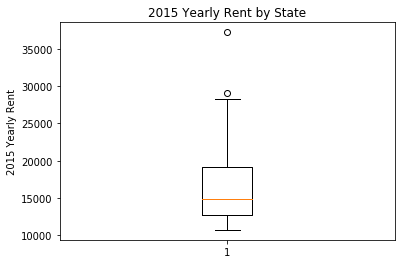

In [74]:
#See if there are any outliers 2015
fig1, ax1 = plt.subplots() 
rent = all["2015 Yearly Rent"]
ax1.set_title('2015 Yearly Rent by State') 
ax1.set_ylabel('2015 Yearly Rent')
ax1.boxplot(rent) 
plt.show()

In [107]:
#Use quartiles to find outliers
quartiles = rent.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = all.loc[(all['2015 Yearly Rent'] < lower_bound) | (all['2015 Yearly Rent'] > upper_bound)] 
outliers

,State,2015 Yearly Rent,2016 Yearly Rent,2017 Yearly Rent,'15-'16 Rent Diff.,'16-'17 Rent Diff.,2015 Income,2016 Income,2017 Income,'15-'16 Income Diff.,'16-'17 Income Diff.,2015 Total Homeless,2016 Total Homeless,2017 Total Homeless
19,Massachusetts,29100.0,30000.0,30000.0,900.0,0.0,70214,73820,73227,3606,-593,21135,19608,17565
29,New York,37200.0,36570.0,38700.0,-630.0,2130.0,60017,62758,62447,2741,-311,88250,86352,89503


In [108]:
no_outliers = all.loc[(all['2015 Yearly Rent'] > lower_bound) & (all["2015 Yearly Rent"] < upper_bound)]

The r-squared: 0.4912116550301172


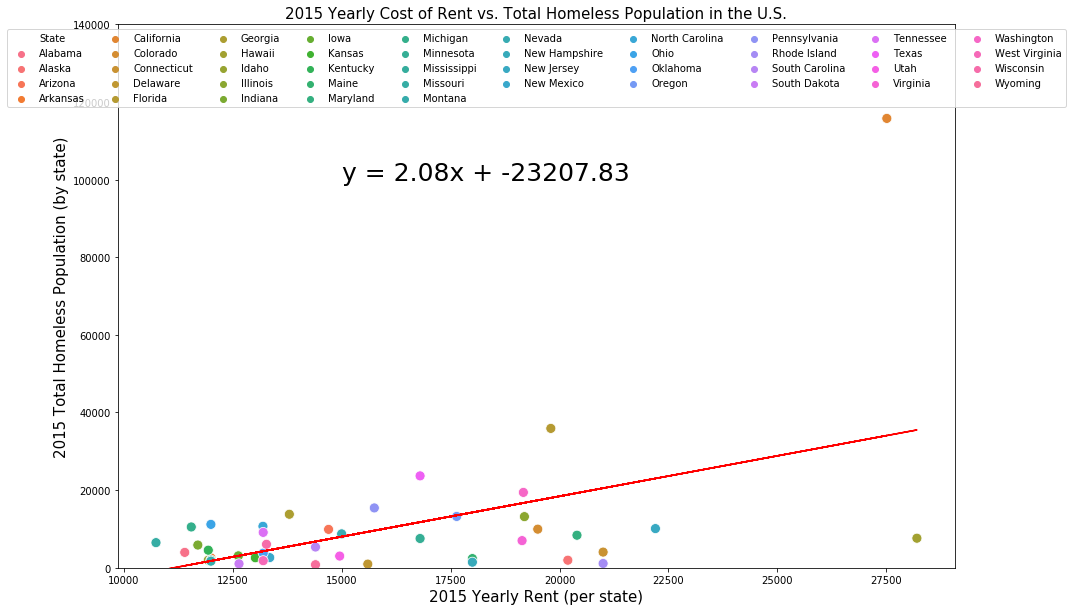

In [109]:
#2015 correlation b/w rent price and homelessness
#Linear regression of all states 2015 (rent vs income)
x_values = no_outliers["2015 Yearly Rent"].astype('float')
y_values = no_outliers["2015 Total Homeless"].astype('float')
states = no_outliers["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_values, y=y_values, hue=states, markers="o", s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(15000,100000),fontsize=25,color="black")
plt.ylim(0,140000)
plt.xlabel('2015 Yearly Rent (per state)', fontsize=15)
plt.ylabel('2015 Total Homeless Population (by state)',fontsize=15)
plt.title("2015 Yearly Cost of Rent vs. Total Homeless Population in the U.S.", fontsize=15)
plt.legend(loc='upper center', ncol=10)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/2015_rent_vs_homeless.png")
plt.show()

The r-squared: 0.5403230730781865


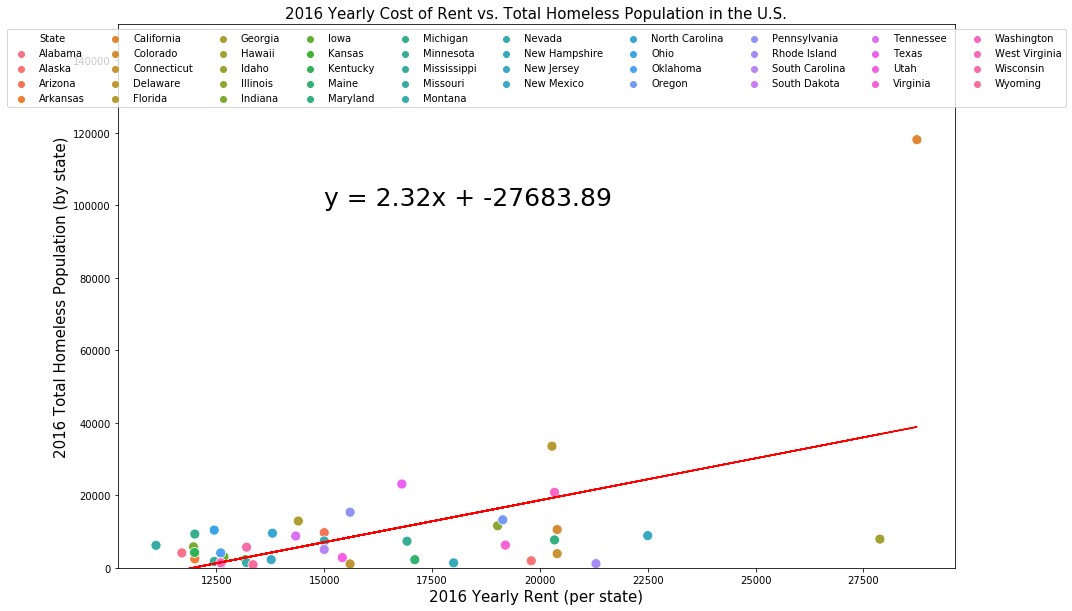

In [111]:
#2015 correlation b/w rent price and homelessness
#Linear regression of all states 2015 (rent vs income)
x_values = no_outliers["2016 Yearly Rent"].astype('float')
y_values = no_outliers["2016 Total Homeless"].astype('float')
states = no_outliers["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_values, y=y_values, hue=states, markers="o", s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(15000,100000),fontsize=25,color="black")
plt.ylim(0,150000)
plt.xlabel('2016 Yearly Rent (per state)', fontsize=15)
plt.ylabel('2016 Total Homeless Population (by state)',fontsize=15)
plt.title("2016 Yearly Cost of Rent vs. Total Homeless Population in the U.S.", fontsize=15)
plt.legend(loc='upper center', ncol=10)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/2016_rent_vs_homeless.png")
plt.show()

The r-squared: 0.5821031496680548


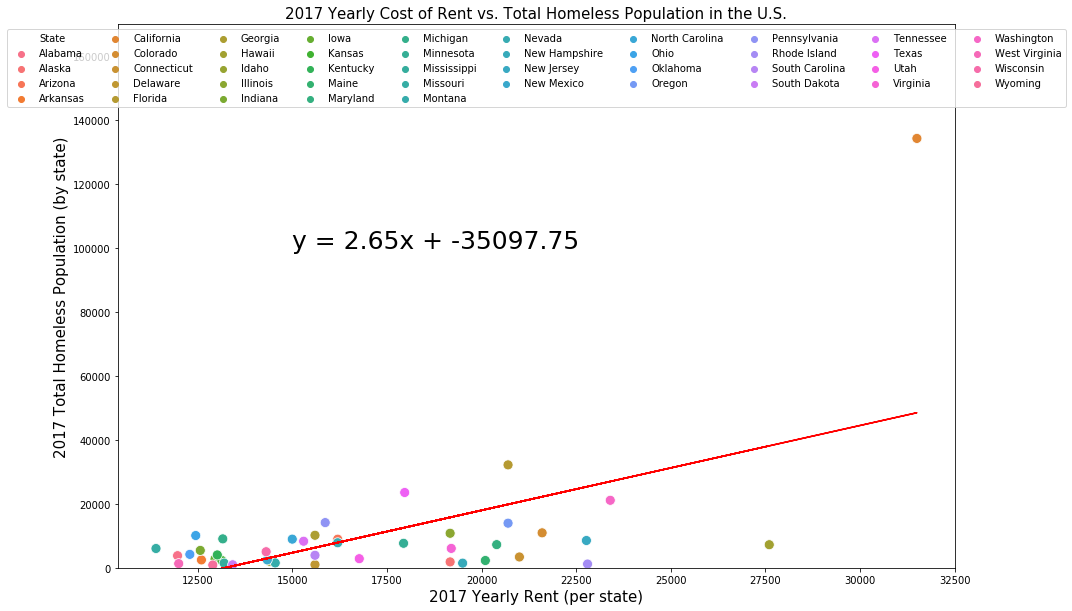

In [110]:
#2015 correlation b/w rent price and homelessness
#Linear regression of all states 2015 (rent vs income)
x_values = no_outliers["2017 Yearly Rent"].astype('float')
y_values = no_outliers["2017 Total Homeless"].astype('float')
states = no_outliers["State"]

#Regress that line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_values, y=y_values, hue=states, markers="o", s=100)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(15000,100000),fontsize=25,color="black")
plt.ylim(0,170000)
plt.xlabel('2017 Yearly Rent (per state)', fontsize=15)
plt.ylabel('2017 Total Homeless Population (by state)',fontsize=15)
plt.title("2017 Yearly Cost of Rent vs. Total Homeless Population in the U.S.", fontsize=15)
plt.legend(loc='upper center', ncol=10)
print(f"The r-squared: {rvalue}")

plt.savefig("../output_data/2017_rent_vs_homeless.png")
plt.show()